# House of Beta
## Case Student Loans

De basisbeurs is returning, but the large majority of students have debts in the form of student loans. In this case, we will explore some calculations involving loans.
- How to calculate monthly payments.
- Investigate the effects of some future economic scenarios.

## The basics

We start off with the basics

In [1]:
notional = 30000
annual_interest = 0.0046
maturity_in_years = 35

## Convert to month
As the repayments are monthly, we need to convert the annual interest to a monthly interest.

You can use the following formulas to convert to monthly data, with $i^m$ as the monthly interest and $i$ as the annual interest. 
$$ i^m = (1 + i)^\frac{1}{12} - 1 $$

In [2]:
monthly_interest = pow(1+annual_interest, 1/12)-1
number_of_payments = maturity_in_years*12
monthly_interest

0.00038252750614442554

## Calculate monthly payments

Student loan payments follow a schedule that is known as an annuity. The total payment each period is unchanging.
$$ N = P * \left(\frac{1 - (1+i^m)^{-n}}{i^m}\right) $$

Here $N$ is the notional, $P$ is the monthly payment and $n$ is the number of payments.

In [3]:
repayment = notional / ((1 - pow(1+monthly_interest, -number_of_payments))/monthly_interest)
repayment

77.33369310581153

## Exercise 1
Let's calculate the repayments when the interest increases by 0.10 percentage points every year, and the interest is fixed every year.
For the first two years, the loan is frozen. 0% interest and no redemptions needed. After those two years, the interest for the first five years is set to 0.46%

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame({'payments': [repayment for t in range(number_of_payments)], 'month': [t+1 for t in range(number_of_payments)]})
df['redemptions'] = df['payments'] * pow(1 + monthly_interest, -(number_of_payments - df['month'] + 1))
df['interest'] = df['payments'] - df['redemptions']
df['notional'] = notional - df['redemptions'].cumsum()
df.head(5)

,payments,month,redemptions,interest,notional
0,77.333693,1,65.857868,11.475825,29934.142132
1,77.333693,2,65.883060,11.450633,29868.259072
2,77.333693,3,65.908262,11.425431,29802.350809
3,77.333693,4,65.933474,11.400219,29736.417335
4,77.333693,5,65.958696,11.374998,29670.458640


<AxesSubplot: xlabel='month'>

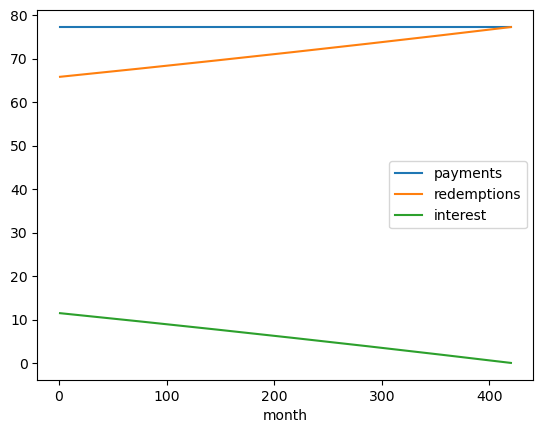

In [6]:

df.plot(x='month', y=['payments', 'redemptions', 'interest'])

After 5 years, the interest has increased to 0.96%. Find the remaining notional at that time and calculate the new monthly payment.
As the exercise is otherwise equal to the calculation we did before, let's create a function for it.

In [7]:
notional_5 = df['notional'][5*12]
monthly_interest_5 = pow(1+annual_interest+0.005, 1/12)-1
number_of_payments_5 = (maturity_in_years - 5)*12
repayment_5 = notional_5 / ((1 - pow(1+monthly_interest_5, -number_of_payments_5))/monthly_interest_5)
print(notional_5, monthly_interest_5, repayment_5)

25936.219119939262 0.0007965014393356284 82.89561787015583


In [8]:
def create_loan_schedule(notional, number_of_payments, interest_per_payment_period):
    repayment = notional / ((1 - pow(1+interest_per_payment_period, -number_of_payments))/interest_per_payment_period)
    dataframe = pd.DataFrame({'payments': [repayment for t in range(number_of_payments)], 'month': [t+1 for t in range(number_of_payments)]})
    dataframe['redemptions'] = dataframe['payments'] * pow(1 + interest_per_payment_period, -(number_of_payments - dataframe['month'] + 1))
    dataframe['interest'] = dataframe['payments'] - dataframe['redemptions']
    dataframe['notional'] = notional - dataframe['redemptions'].cumsum()
    return dataframe

In [9]:
df_5 = create_loan_schedule(notional_5, number_of_payments_5, monthly_interest_5)
df_5.head(5)

,payments,month,redemptions,interest,notional
0,82.895618,1,62.237382,20.658236,25873.981738
1,82.895618,2,62.286954,20.608664,25811.694784
2,82.895618,3,62.336566,20.559052,25749.358218
3,82.895618,4,62.386217,20.509401,25686.972001
4,82.895618,5,62.435908,20.459710,25624.536093


And as we do not want to repeat this process another 6 times, we write a loop to do it for us.

In [14]:
loan_schedules = [df]

for period in range(1, 7):
    previous_schedule = loan_schedules[-1]
    new_notional = previous_schedule['notional'][5*12]
    new_monthly_interest = pow(1+annual_interest + 0.005 * period, 1/12)-1
    new_number_of_payments = (maturity_in_years - 5 * period)*12
    new_loan_schedule = create_loan_schedule(new_notional, new_number_of_payments, new_monthly_interest)
    new_loan_schedule['month'] += period * 5 * 12
    loan_schedules.append(new_loan_schedule)

Now that we have all the repayment schedules, let's paste them on top of each other to see the resulting and final loan schedule.

In [11]:
final_loan_schedule = pd.concat([loan_schedules[period].iloc[period*12:(period+5)*12] for period in range(0, 7)])
   

<AxesSubplot: xlabel='month'>

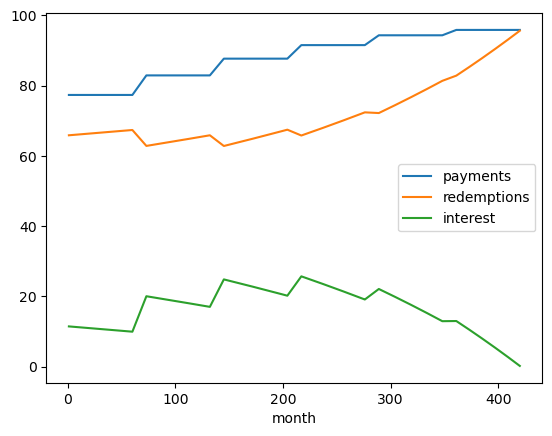

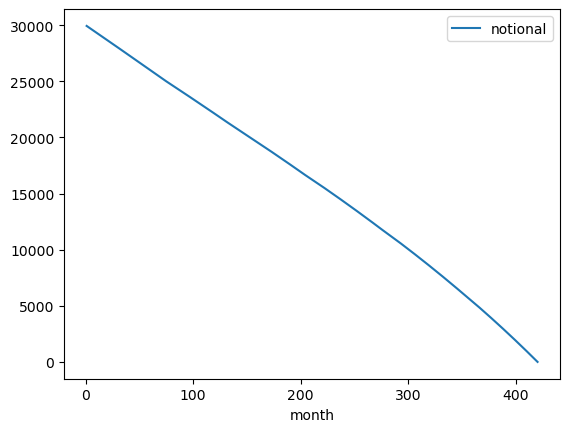

In [12]:
final_loan_schedule.plot(x='month', y=['payments', 'redemptions', 'interest'], kind='line')
final_loan_schedule.plot(x='month', y=['notional'], kind='line')